In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
casf_docking = pd.read_excel('CASF2016_results.xlsx',
                             sheet_name='Docking')
casf_docking.columns = ['Scoring function','Rank','Top 1','Top 2','Top 3','90% confidence interval']
casf_docking = casf_docking[['Scoring function','Top 1','Top 2','Top 3']].copy()
casf_docking[['Top 1','Top 2','Top 3']] = casf_docking[['Top 1','Top 2','Top 3']] *100

file = open('DockingPower_DeepDock_3A/DockingPower_DeepDock_3A.out', 'r')
out = pd. Series(['DeepDock'] + [i.split('=')[-1].strip('%').strip() for i in file.read().split('\n') if 'success rate' in i],
                 index = casf_docking. columns)
file.close()
out[['Top 1','Top 2','Top 3']] = out[['Top 1','Top 2','Top 3']].astype('float')

casf_docking = casf_docking.append(out, ignore_index=True)
casf_docking = casf_docking.sort_values(by=['Top 1', 'Top 2', 'Top 3'])
casf_docking.tail()

,Scoring function,Top 1,Top 2,Top 3
34,DeepDock,87.0,91.9,94.7
3,DrugScoreCSD,87.4,93.3,95.1
2,GlideScore-SP,87.7,91.9,93.7
1,ΔVinaRF20,89.1,94.4,96.5
0,Autodock Vina,90.2,95.8,97.2


In [3]:
casf_screeningFwd = pd.read_excel('CASF2016_results.xlsx',
                             sheet_name='Screening_forward')
casf_screeningFwd.columns = ['Scoring function','Rank','Top 1%','Top 5%','Top 10%','90% confidence interval']
casf_screeningFwd = casf_screeningFwd[['Scoring function','Top 1%','Top 5%','Top 10%']].copy()
casf_screeningFwd[['Top 1%','Top 5%','Top 10%']] = casf_screeningFwd[['Top 1%','Top 5%','Top 10%']] *100

file = open('ScreeningPower_DeepDock_3A/ForwardScreeningPower_DeepDock_3A.out', 'r')
out = pd. Series(['DeepDock'] + [i.split('=')[-1].strip('%').strip() for i in file.read().split('\n') if 'success rate' in i],
                 index = casf_screeningFwd. columns)
file.close()
out[['Top 1%','Top 5%','Top 10%']] = out[['Top 1%','Top 5%','Top 10%']].astype('float')

casf_screeningFwd = casf_screeningFwd.append(out, ignore_index=True)
casf_screeningFwd = casf_screeningFwd.sort_values(by=['Top 1%','Top 5%','Top 10%'])
casf_screeningFwd.tail()

,Scoring function,Top 1%,Top 5%,Top 10%
3,Autodock Vina,29.8,40.4,50.9
2,ChemPLP@GOLD,35.1,61.4,64.9
1,GlideScore-SP,36.8,54.4,63.2
0,ΔVinaRF20,42.1,49.1,54.4
34,DeepDock,43.9,61.4,82.5


In [4]:
casf_screeningRev = pd.read_excel('CASF2016_results.xlsx',
                             sheet_name='Screening_reverse')
casf_screeningRev.columns = ['Scoring function','Rank','Top 1%','Top 5%','Top 10%','90% confidence interval']
casf_screeningRev = casf_screeningRev[['Scoring function','Top 1%','Top 5%','Top 10%']].copy()
casf_screeningRev[['Top 1%','Top 5%','Top 10%']] = casf_screeningRev[['Top 1%','Top 5%','Top 10%']] *100

file = open('ScreeningPower_DeepDock_3A/ReverseScreeningPower_DeepDock_3A.out', 'r')
out = pd. Series(['DeepDock'] + [i.split('=')[-1].strip('%').strip() for i in file.read().split('\n') if 'success rate' in i],
                 index = casf_screeningFwd. columns)
file.close()
out[['Top 1%','Top 5%','Top 10%']] = out[['Top 1%','Top 5%','Top 10%']].astype('float')

casf_screeningRev = casf_screeningRev.append(out, ignore_index=True)
casf_screeningRev = casf_screeningRev.sort_values(by=['Top 1%','Top 5%','Top 10%'])
casf_screeningRev.tail()

,Scoring function,Top 1%,Top 5%,Top 10%
3,ΔVinaRF20,15.1,24.9,31.6
2,DrugScoreCSD,15.4,23.9,33.0
1,GlideScore-SP,16.5,27.0,37.5
0,ChemPLP@GOLD,17.5,29.1,41.1
34,DeepDock,23.9,39.3,50.9


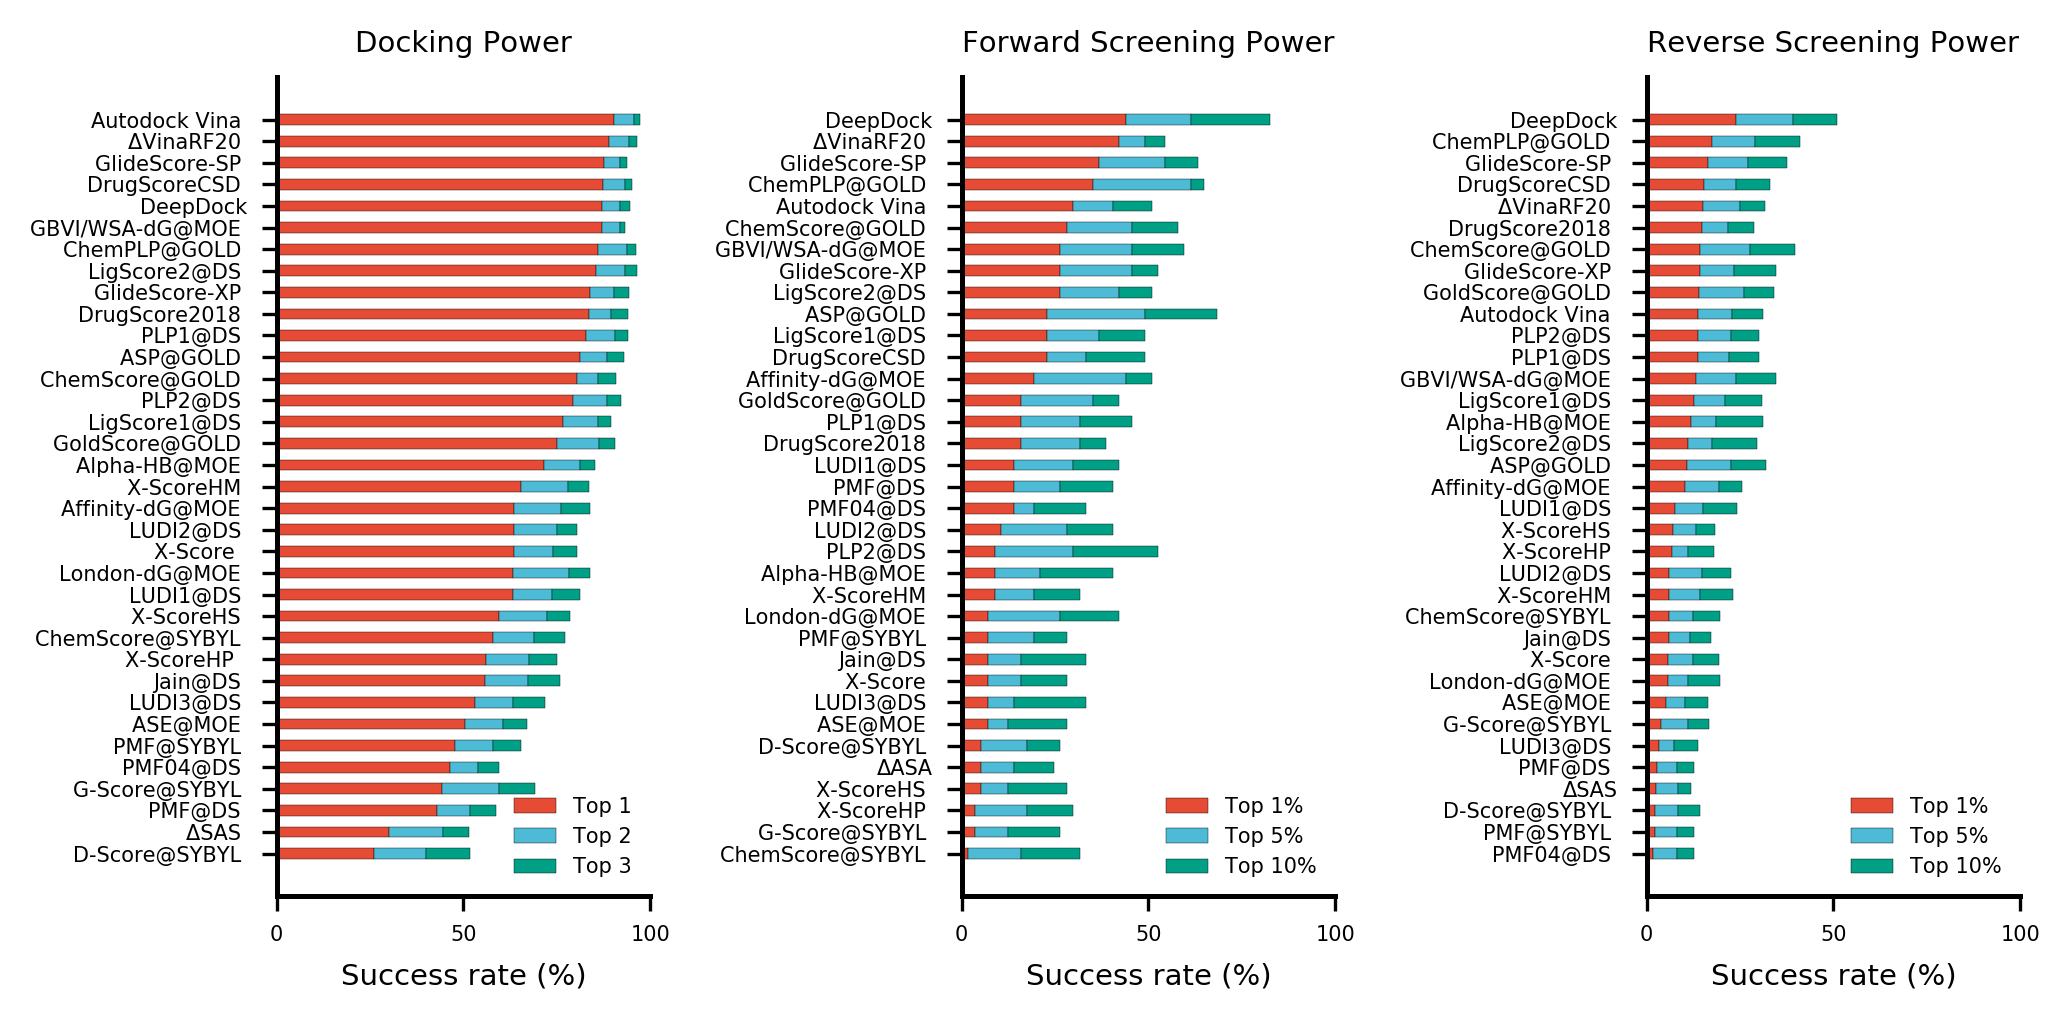

In [5]:
import matplotlib
matplotlib.rcParams.update({'font.size': 10})
width = 0.5

style = 'nature-reviews.mplstyle'
with plt.style.context(style):
    matplotlib.rcParams.update({'xtick.labelsize': 5, 'ytick.labelsize': 5, 'font.size': 5,
                                'axes.titlesize': 7, 'axes.labelsize': 7, 'patch.linewidth':0.1 })
    fig, ax = plt.subplots(1, 3, figsize=[7, 3.5], dpi=300)
    #Docking power
    ax[0].barh(casf_docking['Scoring function'], casf_docking['Top 1'], width, label=casf_docking.columns[1])
    ax[0].barh(casf_docking['Scoring function'], casf_docking['Top 2']-casf_docking['Top 1'], width, 
            label=casf_docking.columns[2], left=casf_docking['Top 1'])
    ax[0].barh(casf_docking['Scoring function'], casf_docking['Top 3']-casf_docking['Top 2'], width, 
            label=casf_docking.columns[3], left=casf_docking['Top 2'])

    ax[0].set_xlabel('Success rate (%)')
    ax[0].set_title('Docking Power')
    ax[0].set_xlim([0, 100])
    ax[0].legend()

    #Forward Screening power
    ax[1].barh(casf_screeningFwd['Scoring function'], casf_screeningFwd['Top 1%'], width, label=casf_screeningFwd.columns[1])
    ax[1].barh(casf_screeningFwd['Scoring function'], casf_screeningFwd['Top 5%']-casf_screeningFwd['Top 1%'], width, 
            label=casf_screeningFwd.columns[2], left=casf_screeningFwd['Top 1%'])
    ax[1].barh(casf_screeningFwd['Scoring function'], casf_screeningFwd['Top 10%']-casf_screeningFwd['Top 5%'], width, 
            label=casf_screeningFwd.columns[3], left=casf_screeningFwd['Top 5%'])

    ax[1].set_xlabel('Success rate (%)')
    ax[1].set_title('Forward Screening Power')
    ax[1].set_xlim([0, 100])
    ax[1].legend()


    #Reverse Screening power
    ax[2].barh(casf_screeningRev['Scoring function'], casf_screeningRev['Top 1%'], width, label=casf_screeningRev.columns[1])
    ax[2].barh(casf_screeningRev['Scoring function'], casf_screeningRev['Top 5%']-casf_screeningRev['Top 1%'], width, 
            label=casf_screeningRev.columns[2], left=casf_screeningRev['Top 1%'])
    ax[2].barh(casf_screeningRev['Scoring function'], casf_screeningRev['Top 10%']-casf_screeningRev['Top 5%'], width, 
            label=casf_screeningRev.columns[3], left=casf_screeningRev['Top 5%'])

    ax[2].set_xlabel('Success rate (%)')
    ax[2].set_title('Reverse Screening Power')
    ax[2].set_xlim([0, 100])
    ax[2].legend(loc="lower right") 

plt.tight_layout()
plt.show()

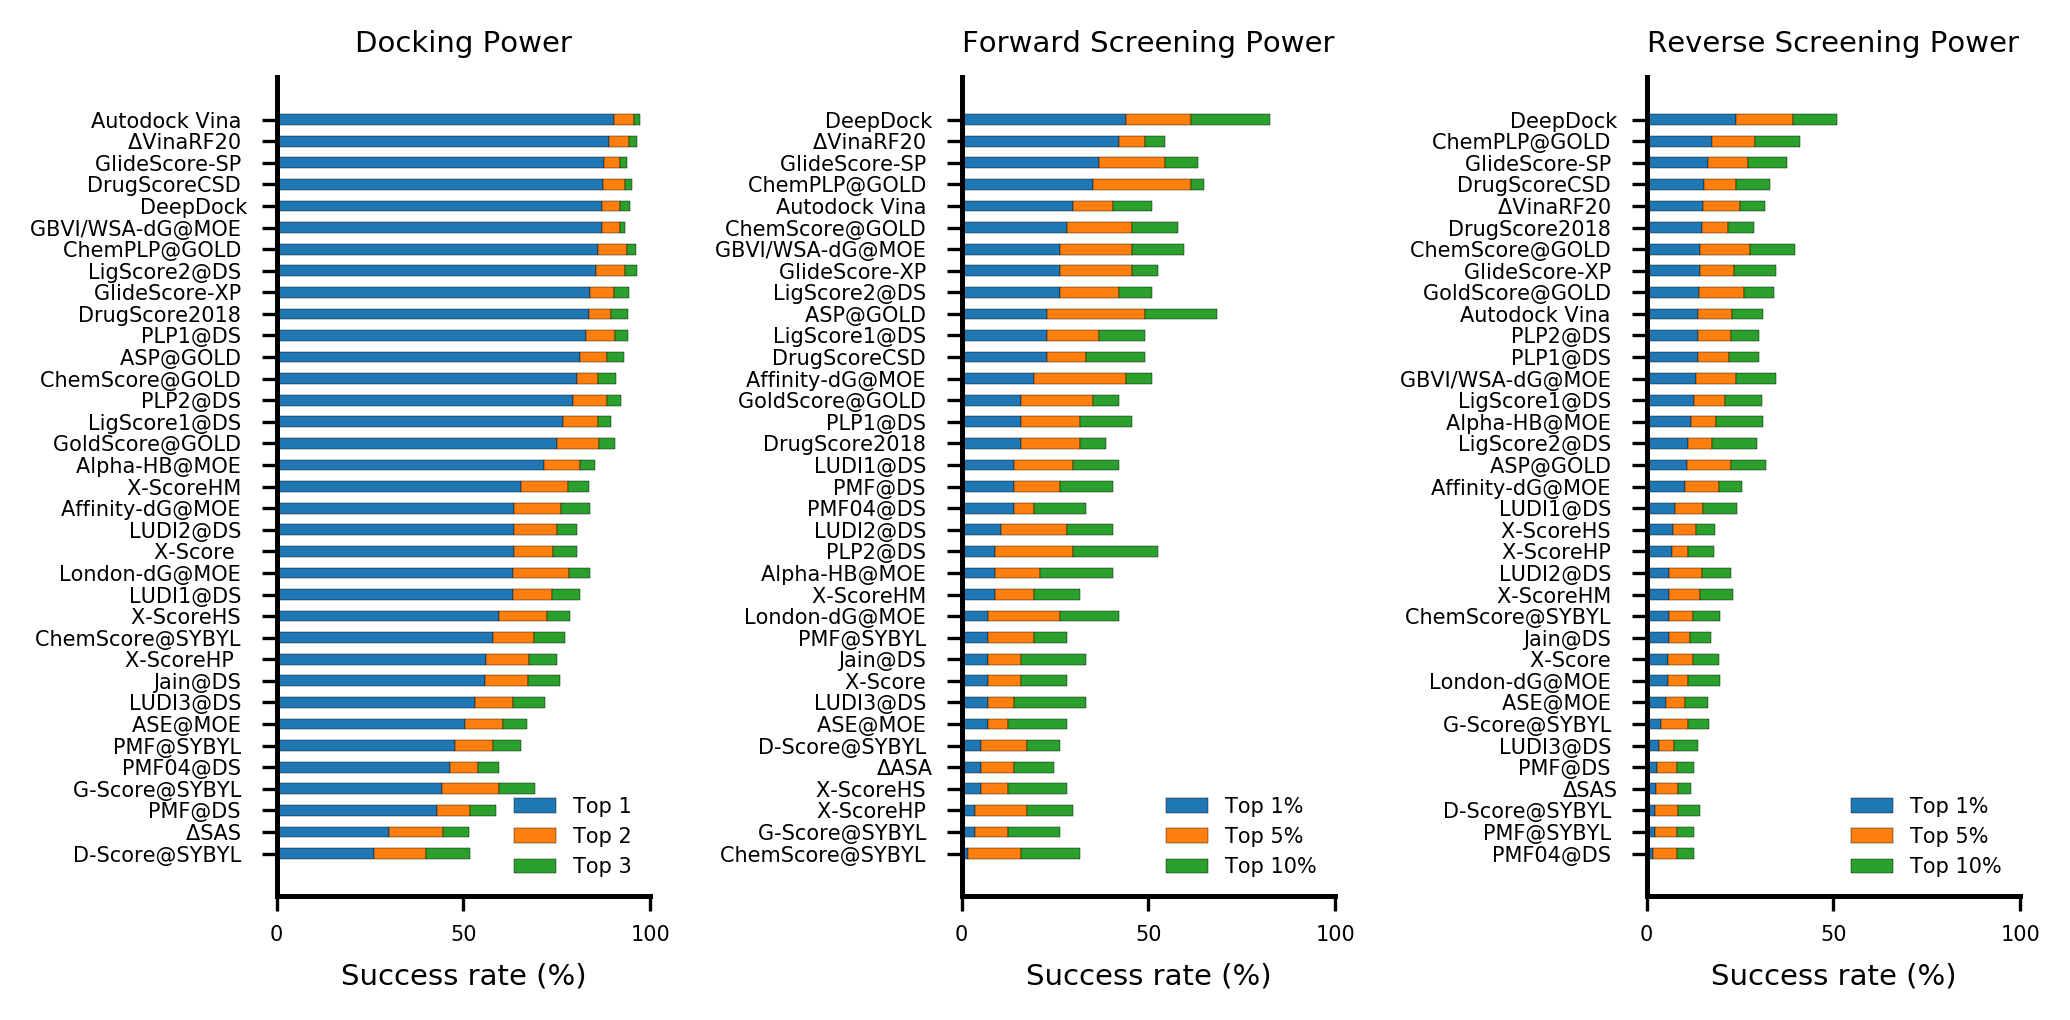

In [6]:
import matplotlib
matplotlib.rcParams.update({'font.size': 10})
width = 0.5

style = 'nature-reviews.mplstyle'
colors =  matplotlib.rcParams["axes.prop_cycle"]
with plt.style.context(style):
    matplotlib.rcParams.update({'xtick.labelsize': 5, 'ytick.labelsize': 5, 'font.size': 5, 'axes.prop_cycle':colors,
                                'axes.titlesize': 7, 'axes.labelsize': 7, 'patch.linewidth':0.1 })
    fig, ax = plt.subplots(1, 3, figsize=[7, 3.5], dpi=300)
    #Docking power
    ax[0].barh(casf_docking['Scoring function'], casf_docking['Top 1'], width, label=casf_docking.columns[1])
    ax[0].barh(casf_docking['Scoring function'], casf_docking['Top 2']-casf_docking['Top 1'], width, 
            label=casf_docking.columns[2], left=casf_docking['Top 1'])
    ax[0].barh(casf_docking['Scoring function'], casf_docking['Top 3']-casf_docking['Top 2'], width, 
            label=casf_docking.columns[3], left=casf_docking['Top 2'])

    ax[0].set_xlabel('Success rate (%)')
    ax[0].set_title('Docking Power')
    ax[0].set_xlim([0, 100])
    ax[0].legend()

    #Forward Screening power
    ax[1].barh(casf_screeningFwd['Scoring function'], casf_screeningFwd['Top 1%'], width, label=casf_screeningFwd.columns[1])
    ax[1].barh(casf_screeningFwd['Scoring function'], casf_screeningFwd['Top 5%']-casf_screeningFwd['Top 1%'], width, 
            label=casf_screeningFwd.columns[2], left=casf_screeningFwd['Top 1%'])
    ax[1].barh(casf_screeningFwd['Scoring function'], casf_screeningFwd['Top 10%']-casf_screeningFwd['Top 5%'], width, 
            label=casf_screeningFwd.columns[3], left=casf_screeningFwd['Top 5%'])

    ax[1].set_xlabel('Success rate (%)')
    ax[1].set_title('Forward Screening Power')
    ax[1].set_xlim([0, 100])
    ax[1].legend()


    #Reverse Screening power
    ax[2].barh(casf_screeningRev['Scoring function'], casf_screeningRev['Top 1%'], width, label=casf_screeningRev.columns[1])
    ax[2].barh(casf_screeningRev['Scoring function'], casf_screeningRev['Top 5%']-casf_screeningRev['Top 1%'], width, 
            label=casf_screeningRev.columns[2], left=casf_screeningRev['Top 1%'])
    ax[2].barh(casf_screeningRev['Scoring function'], casf_screeningRev['Top 10%']-casf_screeningRev['Top 5%'], width, 
            label=casf_screeningRev.columns[3], left=casf_screeningRev['Top 5%'])

    ax[2].set_xlabel('Success rate (%)')
    ax[2].set_title('Reverse Screening Power')
    ax[2].set_xlim([0, 100])
    ax[2].legend(loc="lower right") 

plt.tight_layout()
plt.show()

In [7]:
casf_docking = pd.read_excel('CASF2016_results.xlsx',
                             sheet_name='Docking_Funnel')
df = pd.DataFrame([['DeepDock_3A', 0.610, 0.715, 0.774, 0.798, 0.816, 0.824, 0.827, 0.829, 0.830]], 
                  columns = casf_docking.columns)
casf_docking = pd.concat([df, casf_docking], axis=0)
casf_docking.head()

,Scoring function,0 ~ 2A,0 ~ 3A,0 ~ 4A,0 ~ 5A,0 ~ 6A,0 ~ 7A,0 ~ 8A,0 ~ 9A,0 ~ 10A
0,DeepDock_3A,0.610,0.715,0.774,0.798,0.816,0.824,0.827,0.829,0.830
0,Autodock Vina,0.605,0.618,0.577,0.524,0.476,0.424,0.391,0.361,0.337
1,ΔVinaRF20,0.608,0.623,0.585,0.533,0.486,0.436,0.405,0.375,0.351
2,GlideScore-SP,0.512,0.529,0.504,0.474,0.438,0.403,0.374,0.346,0.324
3,DrugScoreCSD,0.609,0.625,0.593,0.549,0.508,0.464,0.435,0.407,0.385


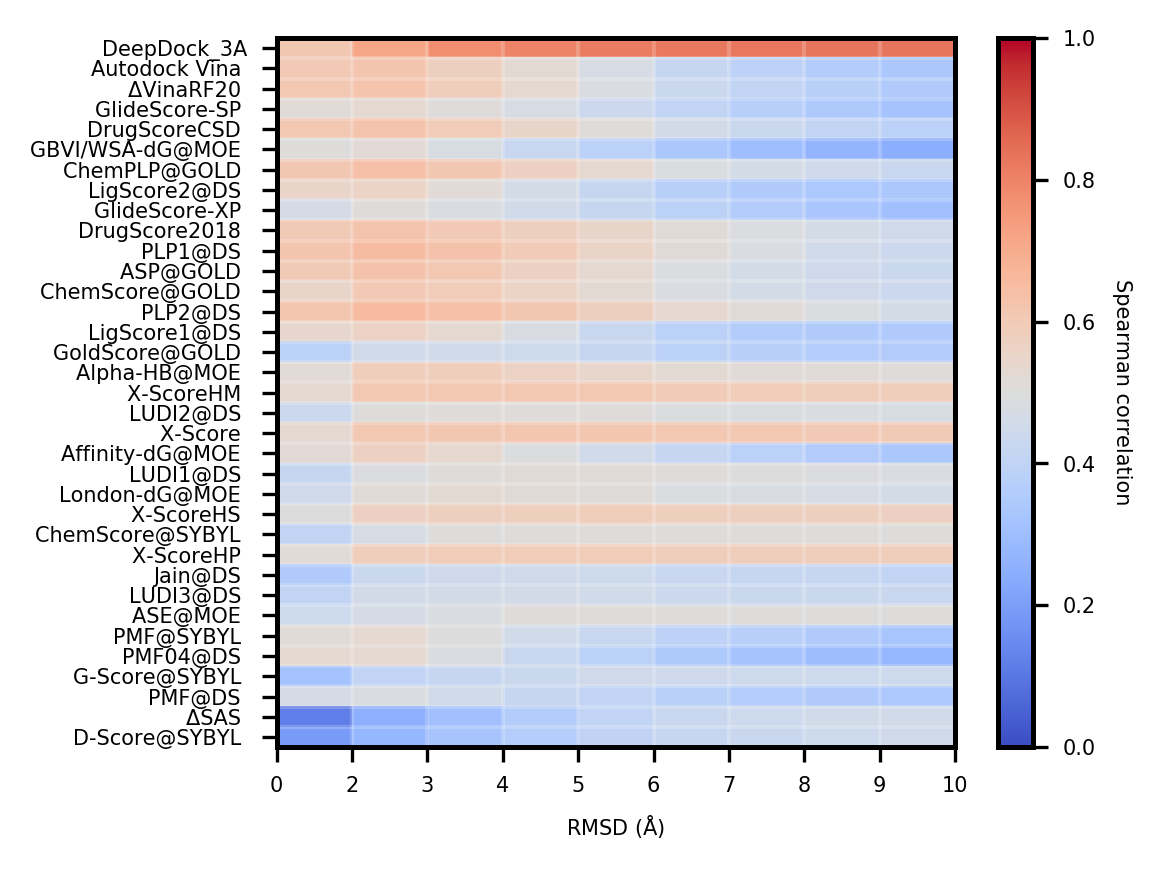

In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import IndexFormatter

score_function = casf_docking['Scoring function  ']
dist = ['0', '2', '3', '4', '5', '6', '7', '8', '9', '10']
val = casf_docking.iloc[:,1:].values

style = 'nature-reviews.mplstyle'
with plt.style.context(style):
    fig = plt.figure(figsize=(7, 3))
    ax1 = plt.subplot2grid((1, 2), (0, 0))
    #ax2 = plt.subplot2grid((1, 2), (0, 1))

    im = ax1.imshow(val, aspect='auto', cmap="coolwarm")

    # Show all ticks
    ax1.set_xticks(np.arange(val.shape[1]+1)-.5)
    ax1.set_yticks(np.arange(len(score_function)))
    
    ax1.set_xticklabels(dist)
    ax1.set_yticklabels(score_function)
    
    im.set_clim(0, 1.0)
    cbar = ax1.figure.colorbar(im, ax=ax1)
    cbar.ax.set_ylabel('Spearman correlation', rotation=-90, va="bottom")
    
ax1.spines['top'].set_visible(True)
ax1.spines['right'].set_visible(True)
#ax1.spines['left'].set_visible(True)
#ax1.spines['bottom'].set_visible(True)

ax1.set_xticks(np.arange(val.shape[1]+1)-.5, minor=True)
ax1.set_yticks(np.arange(val.shape[0]+1)-.5, minor=True)
ax1.tick_params(which='minor', width=0., length=0, labelsize=10)
ax1.grid(which="minor", color="w", linestyle='-', linewidth=1)
ax1.set_xlabel(r'RMSD ($\mathrm{\AA}$)')
    
    
plt.tight_layout()

In [9]:
casf_docking = pd.read_excel('CASF2016_results.xlsx',
                             sheet_name='Screening_forward_EF')
casf_docking[['Min', 'Max']] = casf_docking['90% confidence interval'].str.replace('[', '').str.replace(']', '').str.split(' ~ ',expand=True)
casf_docking[['Min', 'Max']] = casf_docking[['Min', 'Max']].astype(float)
df = pd.DataFrame([['DeepDock_3A', 1, 16.41, np.NaN, np.NaN, '[12.67 ~ 19.91]', 12.67, 19.91]], 
                  columns = casf_docking.columns)
casf_docking = pd.concat([df, casf_docking], axis=0)
casf_docking = casf_docking.sort_values(by=['Top1%'])
casf_docking.tail()

,Scoring function,Rank,Top1%,Top 5%,Top 10%,90% confidence interval,Min,Max
3,GlideScore-XP,2,8.83,4.75,3.51,[6.42 ~ 11.79],6.42,11.79
2,GlideScore-SP,1,11.44,5.83,3.98,[8.59 ~ 14.84],8.59,14.84
1,ΔVinaRF20,1,11.73,4.43,3.10,[8.84 ~ 15.41],8.84,15.41
0,ChemPLP@GOLD,1,11.91,5.29,3.59,[9.08 ~ 15.50],9.08,15.50
0,DeepDock_3A,1,16.41,NaN,NaN,[12.67 ~ 19.91],12.67,19.91


/home/omendezl/.local/lib/python3.6/site-packages/matplotlib/patches.py:75: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties.
  warnings.warn("Setting the 'color' property will override"


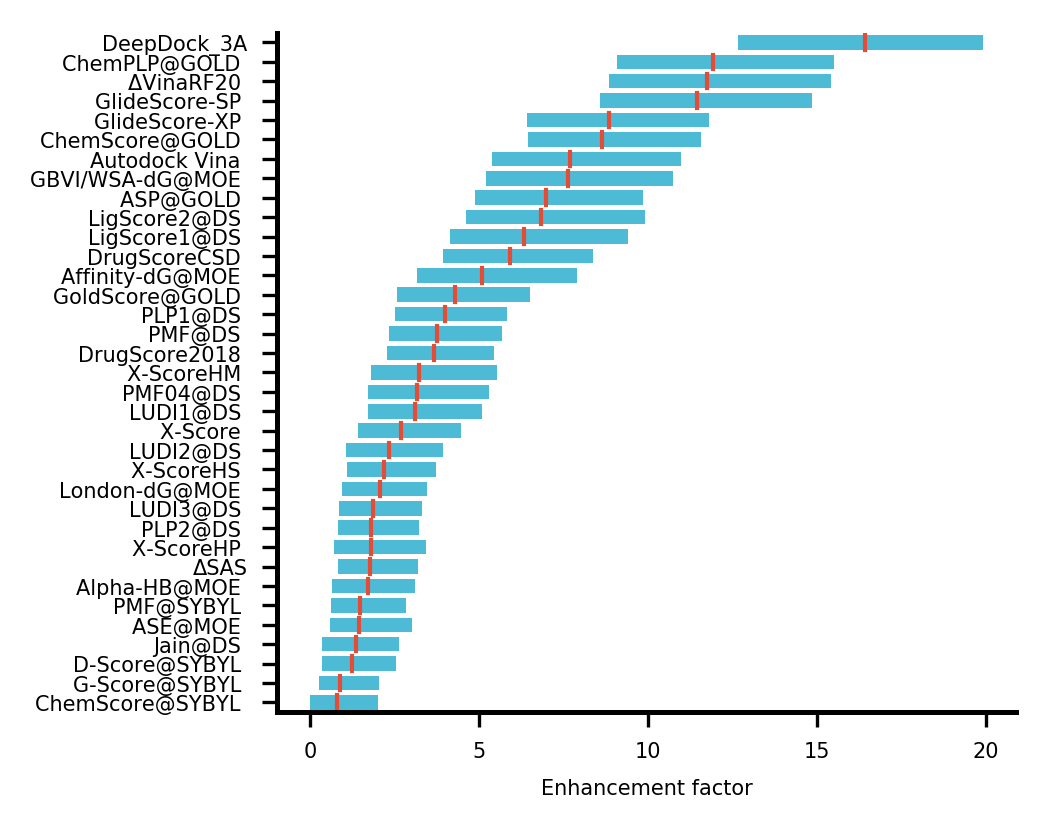

In [10]:
# https://matplotlib.org/stable/gallery/statistics/bxp.html
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import IndexFormatter

plot_data = [{'label':sf[0], 'med':sf[2], 'whislo':sf[6], 'q1':sf[6], 'whishi':sf[7], 'q3':sf[7]} for sf in casf_docking.values] 

style = 'nature-reviews.mplstyle'
with plt.style.context(style):
    fig = plt.figure(figsize=(7, 3))
    ax1 = plt.subplot2grid((1, 2), (0, 0))
    #ax2 = plt.subplot2grid((1, 2), (0, 1))

    #ax1.barh(casf_docking['Scoring function'], casf_docking['Top1%'], width, 
    #         xerr=(casf_docking['Top1%']-casf_docking['Min'], casf_docking['Max']-casf_docking['Top1%']),
    #         error_kw=dict(lw=3, ecolor='blue'))
    ax1.set_xlabel('Enhancement factor')
    
    ax1.bxp(plot_data, showfliers=False, showcaps=False, vert=False, patch_artist=True, widths = 0.75,
            medianprops=dict(linestyle='-', linewidth=1, color='#E64B35'),
            boxprops=dict( color='#4DBBD5'))


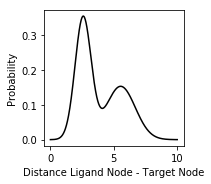

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
%matplotlib inline

#matplotlib.rcParams.update({'font.size': 10})
#matplotlib.rcParams.update({'axes.titlesize': 10})
np.random.seed(1)

mus =  np.array([[2.5], [5.0]])
sigmas = np.array([[0.7], [1.5]]) #** 2
gmm = GaussianMixture(2)
#gmm.means_init = mus
#gmm.covars_ = sigmas
#gmm.weights_ = np.array([0.5, 0.5])

#Fit the GMM with random data from the correspondent gaussians
gaus_samples_1 = np.random.normal(mus[0], sigmas[0], 100).reshape(100,1)
gaus_samples_2 = np.random.normal(mus[1], sigmas[1], 100).reshape(100,1)

fit_samples = np.concatenate((gaus_samples_1, gaus_samples_2))
gmm.fit(fit_samples)

fig = plt.figure(figsize=[2.5, 2.5])
ax = fig.add_subplot(111)
x = np.linspace(0, 10, 1000).reshape(1000,1)
logprob = gmm.score_samples(x)
pdf = np.exp(logprob)
#print np.max(pdf) -> 19.8409464401 !?
ax.plot(x, pdf, '-k')

ax.set_xlabel('Distance Ligand Node - Target Node')
ax.set_ylabel('Probability')
#ax.set_title('Distance probability')



plt.show()